# Milestone 2

### Differtless: Teresa Datta, Anastasia Ershova, Mark Penrod, Will Wang

## Introduction 
Differentiation of functions helps find the maxima, minima, and zero points that are essential for optimization and prediction in scientific problems. Automatic differentiation (AD) is a computational approach that automatically finds the derivatives of a function using a computer program. For a given function, the AD software should be able to compute the derivatives of any order with machine precision. 

Automatic differentiation is different from classical methods such as symbolic differentiation and numerical differentiation, as AD method requires much less computational time and is not affected by numerical instability unlike classical methods.


Differtless is a software package for performing AD, with additional functionality for performing optimization to find stationary points of functions.

## Background
Automatic differentiation is based on the decomposition of differentials using chain rule. Separated by the order of chain rule calculation, AD can be divided into two modes: forward mode and reverse mode. The forward mode calculates derivatives from the inner function to the outer function using chain rule repeatedly, while the reverse mode calculates from outside to inside. 
We can also say the forward mode calculates the product of the function's Jacobian matrix $J$ with the seed vectors specified by input variables, while reverse modes computes the product of the transpose of Jacobian matrix $J^T$ with  seed vectors. In a function with $m$ inputs and $n$ functions, represented by $R^m \rightarrow R^n$, forward mode is more efficient when $n$ >> $m$, while reverse mode is more efficient when $n$ << $m$.

A computational graph is useful in visualizing the propagation of elementary operations that construct the function to be auto-differentiated. From here, it is easy to evaluate the numerical value after each operation, the derivatives of the elementary operations, and numerical values of derivatives with respect to each input variable.

For an example function 

$$
f(x,y)=
\left[
\begin{matrix}
c_1 & c_2
\end{matrix}
\right]
\left[
\begin{matrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{matrix}
\right]
\left[
\begin{matrix}
x  \\
y
\end{matrix}
\right]
$$

<!-- The computational graph is 
![](img/comp.png)

The evaluation trace is 
![](img/trace.png) -->


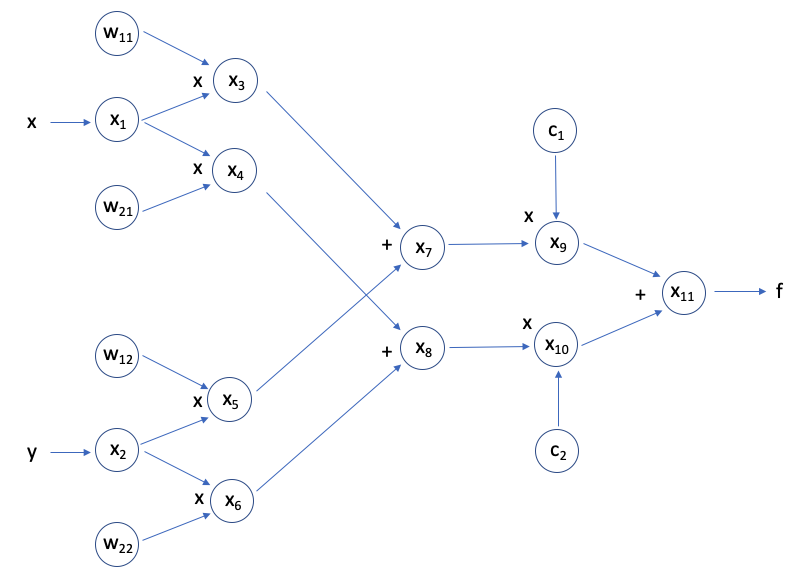

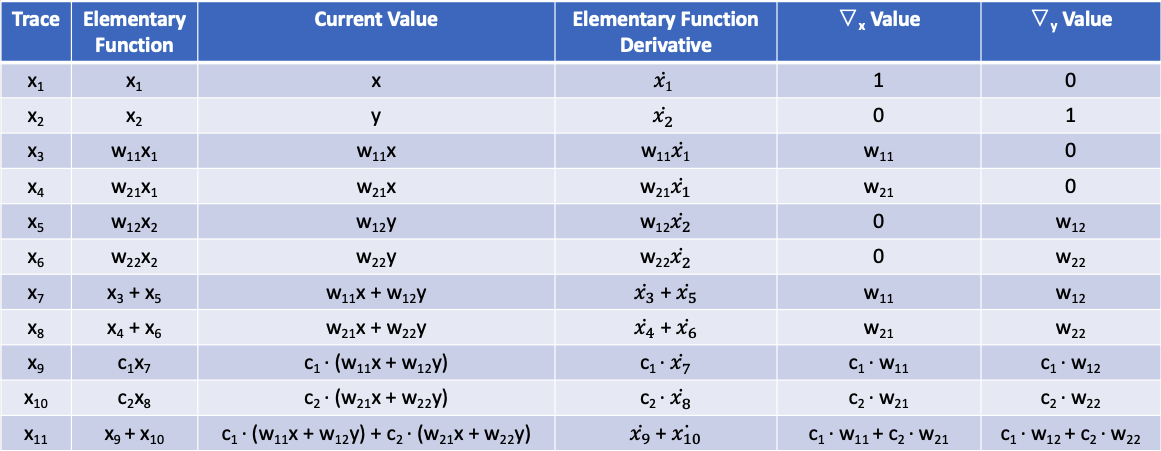

In [1]:
from IPython.display import Image, display
display(Image(filename='img/comp.png', embed=True))
display(Image(filename='img/trace.png', embed=True))

## How to use Differtless

`differtless` can be obtained by `git clone https://github.com/differtless/cs107-FinalProject.git`

The user can then install the `differtless` package by running `pip install .`

Installation of package dependencies is handled in `setup.py` 

    # example installation
    >> git clone https://github.com/differtless/cs107-FinalProject.git
    >> cd cs107-FinalProject
    >> pip install .
    


Once the user has downloaded differtless they can run `from differtless import ad` and `import differtless.operations as op` in their driver script. Then when they have a function that they would like to automatically differentiate, they will: 

1. Define the function, using either elementary operations (which we have overloaded- add, subtract, etc) or `differtless` operations for elementary functions (e.g. `op.sin`, `op.exp`)

2. User calls the forward function with their pre-defined function, inputs, and seeds.
    *  This includes the preprocessing step.

This will return the value and corresponding derivatives.

##### Example: 

    from differtless import ad
    import differtless.operations as op

    # Define a function and provide inputs/seeds

    def my_fav_function(x, y, z):
        return x*y + op.exp(z)

    inputs = [1,2,3]
    seeds = [[42, 1, 1], [2, 42, 2], [3, 3, 42]]

    # Run automatic differentiation

    my_fav_function_ad = ad.forward(my_fav_function, inputs, seeds)

    print(f'Function value: {my_fav_function_ad.value}')

    print(f'Function derivatives: {my_fav_function_ad.gradients}')

    print(f'Function Jacobian: {ad.Jacobian(my_fav_function, inputs)}')

    ## Additional optimization routine - not yet implemented

    # my_minimum = ad.minimize(func = my_fav_function, guess = [42, 42, 42])

    # print(my_minimum)


#### Demo: 
Now you try!

In [ ]:
#1. Import
from differtless import ad
import differtless.operations as op

#2. Define a function you are interested
def function_of_interest(x,y):
    #i.e. return x + y
    #i.e. return (op.exp(x)^2)/y
    pass

#3. Define inputs, a list of length N, the number of inputs to your previously defined function
inputs = ___

#4. Define seeds (an optional step), a list of N lists of length N
seeds = ____

#5. Run automatic differentiation
function_ad = ad.forward(___, ___, ___)

print(f'Function value: {function_ad.value}')

print(f'Function derivatives: {function_ad.gradients}')

print(f'Function Jacobian: {ad.Jacobian(function_of_interest, inputs)}')




## Software Organization

Directory Structure:

differtless/
* README.md
* setup.py
* .gitignore
* .travis.yml
* codecov.yml
* requirements.txt
* docs/
    * milestone1.ipynb
    * milestone2_progress.md
    * milestone2.ipynb *(this document)*
    * tutorial.ipynb
* tests/
    * tests.py
* differtless/
    * \_\_init__.py
    * operations.py
    * ad.py

Functionality: 
* Documentation will provide both docstring style documentation (in addition to docstrings in .py files) and also interactive short tutorials in the form of jupyter notebooks.
* `tests` provides for a comprehensive set of testing programs, and is where our Test Suite will live!
* `operations` includes elementary functions such as sin and exp (based on `numpy`), adapted for our datatype to yield their evaluation and derivative
* `ad` implements the forward mode of automatic differentiation: preprocessing of user inputs, execution, and future optimization functionality (`scipy` required for optimization)

Testing: 
The test suite will live in tests/ and uses `pytest`. We utilize Travis CI as a continuous integration mechanism to ensure our project is constantly building and passing. We also use CodeCov to ensure our testing suite is testing all parts and branches of the code. 

We will distribute our package via pip (PyPi) and Conda. Currently it is only available through GitHub (see above for installation instructions).

## Implementation


### Dependencies

`numpy` for elementary functions, `scipy` for optimization and other functions

### Core Data Structures and Classes

Our implementation, through our created class `FuncInput` takes advantage of NumPy's `array` for storing FuncInput value and derivative information. NumPy arrays have the advantage of mutability and simple execution of pair-wise vector operations.

### Handling Vector-Valued Functions

The user can input vectors in order to automatically differentiate vector-valued functions by inputing a tuple or list to represent vector values. During the preprocessing step each of the components will be converted to our `FuncInput` data type.

### `operations` module

Here we define elementary functions for which we cannot use operator overloading to return their evaluation and derivative (requires `numpy` as a dependency).
    * For future milestones, we plan to implement a wider selection of `numpy` and `scipy` methods 

### `ad` module

* `preprocess` function
    * Allows us to deal with scalars and vectors
    * Takes in a `list`  of `inputs` (1 x N) (where each input can be a scalar, or a tuple or list- for handling vector values) and an optional matrix `seeds` (N x N)
    * If the user inputs a scalar it will be converted to a 1 x 1 vector
    * `seeds` defaults to None, in which case we will use an N x N identity matrix where `N = len(inputs)`
    * For each value in `inputs` (and if the inputs are vectors, each component in each vector) and row in `seeds` we will instantiate the `FuncInput` object described below
* `FuncInput` class
    * Parameters: `input` (value - `np.array`) and `seed` (seed vector – `np.array`) 
    * The class has two instance variables: `self.val_ = value` (value) and `self.ders_ = seed` (list of derivative values)
        * Two getter methods are implemented with the `@property` decorator to allow indirect access to the instance variables
    * In this class we use dunder methods for operator overloading of elementary operations (e.g. `__add__, __sub__, __mul__, __floordiv__, __truediv__, __mod__, __pow__`) to return evaluation and derivative
    * In our `Operations` module we implement other elementary operations (e.g. sin, exp)
    * In both cases the methods return a new instance of `FuncInput` with the `evaluation` and `[evaluation of derivatives]` as inputs
* `forward` function
    * Parameters: `func` (user-defined function, can be scalar or vector), `inputs`, `seeds`
    * Executes `preprocess` function on `inputs` and `seeds` to convert to FuncInput objects
    * Executes forward mode of automatic differentiation
    * Returns evaluation and derivative calculation
* `Jacobian` function
    * Parameters: `func` (user-defined function, can be scalar or vector), `inputs`
    * Executes `forward` function on the function, `func`, and `inputs` using the default `seed` (`[]` which will produce an indentity matrix)
    * Accesses the gradient of the result, which is the Jacobian
* `minimize` function
    * not yet implemented, but planned for future work as outlined below



## Future Features

Given that a large application space for AD is optimization, we plan to integrate `scipy`'s optimization routines to work directly with `differtless`:

* `minimize` function
    * Parameters: `func` (user-defined function), `guess` (initial guess), `scipy.optimize.minimize` `*args`
    * Uses forward functionality to calculate Jacobian matrix and interfaces with `scipy.optimize.minimize`
    * Returns optimization result

In order to extend the functionality of `differtless` beyond what is currently possible with conventional AD packages (such as `autograd`), we also plan to:

* first implement a wider range of `numpy` and `scipy` functions than the elemental functions to make the utility of our package more comparable
* implement functions that are not typically implemented in other AD packages, such as:
    * `cdf` and `logcdf` methods for distributions like `scipy.stats.multivariate_normal` and `scipy.stats.gamma` – this would be useful for applications such as samplers relying on gradient descent which commonly use automatic differentiation (currently one would need to define the derivatives by hand for distributions not implemented in `autograd`)
    * other `scipy` functions like distance metrics (e.g. Hamming distance etc) – implementing these functions directly in `differtless` would avoid the end-user having to manually redefine these.

Implementing these features should not require any changes to the directory structure/core classes, as the optimization routines will be implemented as new functions that utilise the core functionality, and any new operations will be implemented in a similar manner to those already in `operations.py`. The main challenge we foresee with these new features is that the implementation of derivatives of functions not commonly available might be challenging, as that might be part of the reason why they are not commonly available.